In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Open the .nc file as a dataset using xarray (path = '/data/keeling/a/kevintg2/scratch/ATMS-596/Week5/CM1updraft.nc')
ds = xr.open_dataset('/data/keeling/a/kevintg2/scratch/ATMS-596/Week5/CM1updraft.nc')

In [3]:
#Get some info about the dataset
ds

<xarray.Dataset>
Dimensions:  (nk: 108, nj: 600, ni: 600)
Coordinates:
    time     timedelta64[ns] ...
Dimensions without coordinates: nk, nj, ni
Data variables:
    z        (nk) float32 ...
    y        (nj) float32 ...
    x        (ni) float32 ...
    w        (nk, nj, ni) float32 ...
    dbz      (nk, nj, ni) float32 ...

In [4]:
#Pull some variables from the dataset
z = ds.z
y = ds.y
x = ds.x
w = ds.w

In [5]:
#Assign the values of the z, y, and x to be the coordinates of the w field
w = w.assign_coords(nk=z)
w = w.assign_coords(nj=y)
w = w.assign_coords(ni=x)

In [6]:
#Select a 2d slice of w at a specified height
wlev = w.sel(nk=3,method='nearest')

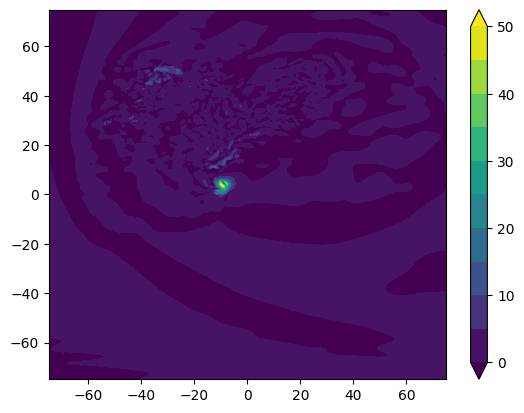

In [7]:
#Make a plot. First define the contour levels, then do the plotting with matplotlib
clevs = np.arange(0,55,5)
plt.contourf(wlev.coords['ni'],wlev.coords['nj'],wlev,levels=clevs,extend='both')
plt.colorbar()

In [8]:
#Select a subset of w so we can zoom in
wzoom = w.sel(nj=slice(-10,10),ni=slice(-20,0))

In [9]:
#Show the info for the new wzoom field
wzoom

<xarray.DataArray 'w' (nk: 108, nj: 80, ni: 80)>
[691200 values with dtype=float32]
Coordinates:
    time     timedelta64[ns] 01:20:00
  * nk       (nk) float32 0.0125 0.0375 0.0625 0.0875 ... 18.69 19.01 19.34
  * nj       (nj) float32 -9.875 -9.625 -9.375 -9.125 ... 9.375 9.625 9.875
  * ni       (ni) float32 -19.88 -19.62 -19.38 -19.12 ... -0.625 -0.375 -0.125
Attributes:
    long_name:  w interpolated to scalar points
    units:      m/s

In [10]:
#Choose the height to plot again
wlev = wzoom.sel(nk=3,method='nearest')

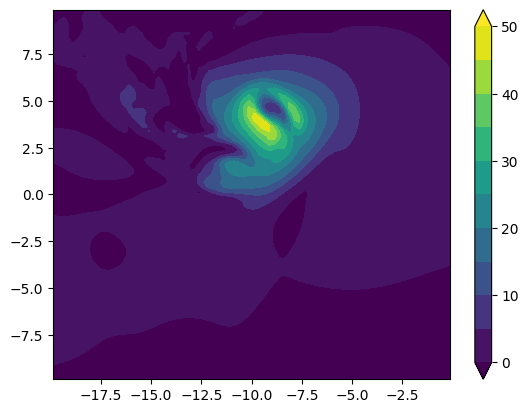

In [11]:
#Make a plot
plt.contourf(wlev.coords['ni'],wlev.coords['nj'],wlev,levels=clevs,extend='both')
plt.colorbar()

In [12]:
#Select a slice along a specific x or y value to get a 2d vertical cross-section
wvert = wzoom.sel(ni=-10,method='nearest')

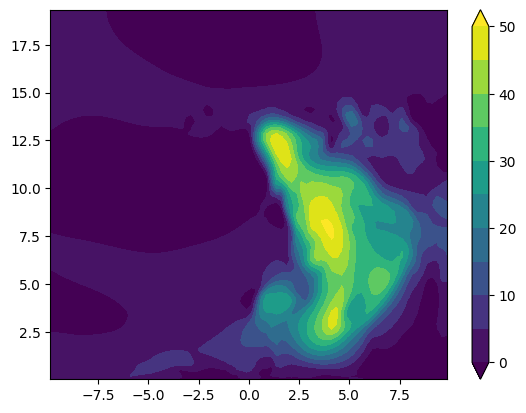

In [13]:
#Make a plot of the vertical cross-section
plt.contourf(wvert.coords['nj'],wvert.coords['nk'],wvert,levels=clevs,extend='both')
plt.colorbar()

In [14]:
wavg = wzoom.sel(nk=slice(1,3))
wavg3_5km = wavg.mean(dim='nk')

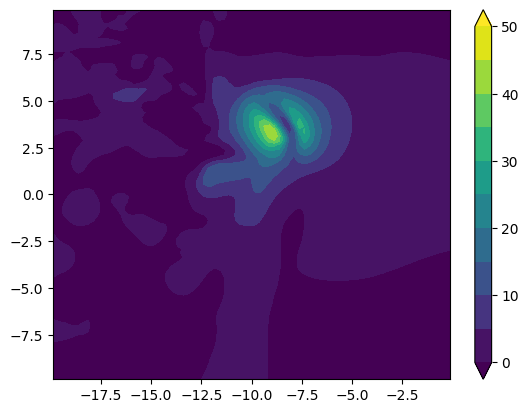

In [15]:
plt.contourf(wavg3_5km.coords['ni'],wavg3_5km.coords['nj'],wavg3_5km,levels=clevs,extend='both')
plt.colorbar()